In [9]:
from loggify_llm.chat.chat_openai import ChatOpenAI, ChatOpenAIVision
from datetime import datetime

## Initialize Large Language Model Object

In [2]:
llm = ChatOpenAI()

🔥 Successfully Get Access Database


## Case Study 1: System's prompt takes a short instruct from user's prompt

In [3]:
system_prompt = """
    You possess in-depth knowledge of natural images and can describe them with ease. \
    From the given input text indicating the category name of a certain object, your task involves the following steps:
    1-Imagine a scene containing the input object.
    2-Generate 4 descriptions about different key appearance features of the input object from the imagined scene, with each description having a maximum of 16 words.
    3-Output a JSON object containing the following key:
        "description": <list of 4 descriptions>

    Use the following examples:
        Input text: "sea lion"
        Answer: "description": ["A round-bellied seal sits on a rock, looking intently at something off-camera.", "The seal lies with flippers tucked, sleek body well-maintained.", "The seal's thick, smooth fur and large dark eyes show alertness and curiosity.", "Turquoise water contrasts with the seal's brown fur and grey rock, highlighting its natural environment."]
"""
response = llm.request(system_prompt=system_prompt, user_prompt="British shorthair")
print(response)

🔥 Successfully Log Request to Database
{'request_id': 'chatcmpl-9tAV8YfjHJprijFv0DAGbIZl8gesD', 'llm_model': 'gpt-3.5-turbo', 'input': [{'role': 'system', 'content': '\n    You possess in-depth knowledge of natural images and can describe them with ease.     From the given input text indicating the category name of a certain object, your task involves the following steps:\n    1-Imagine a scene containing the input object.\n    2-Generate 4 descriptions about different key appearance features of the input object from the imagined scene, with each description having a maximum of 16 words.\n    3-Output a JSON object containing the following key:\n        "description": <list of 4 descriptions>\n\n    Use the following examples:\n        Input text: "sea lion"\n        Answer: "description": ["A round-bellied seal sits on a rock, looking intently at something off-camera.", "The seal lies with flippers tucked, sleek body well-maintained.", "The seal\'s thick, smooth fur and large dark eye

## Case Study 2: Prompt an image

🔥 Successfully Get Access Database


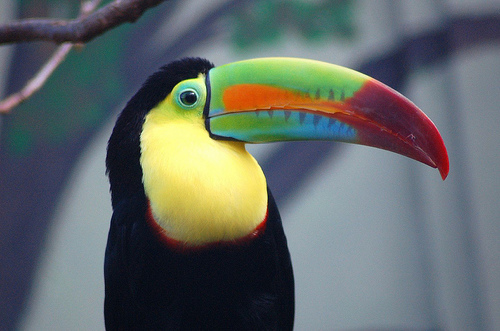

👾 Warning: Failed to refine the output of LLM because: Expecting value: line 1 column 1 (char 0)
🔥 Successfully Log Request to Database
{'request_id': 'chatcmpl-9tAVgHDSLPeAll2bYBneX4VsVqj7g', 'llm_model': 'gpt-4-vision-preview', 'input': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Please describe the object in this image?'}, {'type': 'image_url', 'image_url': {'url': ''}}]}], 'output': "The image shows a close-up of a toucan, which is a tropical bird known for its large, colorful bill. This particular toucan has a striking bill with a red tip, followed by orange, green, and blue hues towards the base. The bird's plumage is primarily black with a white throat and yellow around the chest area. Its skin around the eye is green, and the eye itself is dark. The toucan is perched, and in the background, there appears to be a blurred natural environment, suggesting that the photo might have been taken in a habitat that mimics the bird's natural surroundings, such as a zoo or a bi
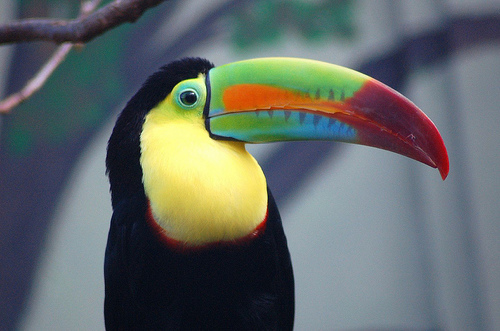

In [8]:
vision_llm = ChatOpenAIVision()

response = vision_llm.request(
    image_url="./bird.JPEG", ## https://as2.ftcdn.net/v2/jpg/06/07/15/91/1000_F_607159100_WqruV2kR0i7dPAq57F4i7SFEJCscSC1x.jpg || ./bird.JPEG
    user_prompt="Please describe the object in this image",
    show_preview=True
)
print(response)

## Monitor Database

In [17]:
records = llm.mongo_logger.query_collection(query={"time": {"$gte": datetime(2024, 8, 8, 0, 0, 0)}})
import pandas as pd
import json
df_ = pd.DataFrame(records)
df_["total_tokens"].sum()

1305664

In [29]:
records[-1]

{'_id': ObjectId('66b4a52e6b2f6a0fb95fa717'),
 'request_id': 'chatcmpl-9tvA1jTyjOwW6uG7ybrObSf1SLrRX',
 'llm_model': 'gpt-3.5-turbo',
 'input': '[{"role": "system", "content": "\\n    You possess in-depth knowledge in checking the quality of the answer to a given instruction. \\n    From the given input, which is a pair of instruction and answer, your task involves the following steps:\\n    1. Explain why the given answer is not good for its instruction. Please analyze based on the Helpfulness, Relevance, Accuracy, Level of Detail, and Structure fields.\\n    2. Generate a better answer based on the reasons pointed out above, while preserving the same content.\\n    3. Output a JSON object containing the following keys:\\n        {\\n            \\"explanation\\": {\\n                \\"helpfulness\\": <a brief comment on the helpfulness level, maximum 20 tokens>,\\n                \\"relevance\\": <a brief comment on the relevance level, maximum 20 tokens>,\\n                \\"accur

In [27]:
print(json.dumps(json.loads(records[-1]["output"]),indent=4))

{
    "explanation": {
        "helpfulness": "The answer provides detailed information on the contents of the image, but it lacks precision and clarity",
        "relevance": "The response addresses the instruction by describing various elements in the image, but it needs to be more focused and specific",
        "accuracy": "The answer seems accurate in describing the contents of the image, but it can be improved for better clarity and precision",
        "detail": "The answer contains a high level of detail, but it needs to be organized and presented more clearly",
        "structure": "The answer lacks a clear structure and is presented in a somewhat convoluted manner"
    },
    "revision": "(a) and (b) Simulated far-field reflection Rpp and Rss for incident planes along \u0413X (\u03c6 = 0\u00b0) and \u0413M (\u03c6 = 45\u00b0) direction. (c) Effect of sectioned metallic rods on reflection at the outmost surface cell with varying length, h, as shown in (d1). The length ranges fro